In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import glob, os

In [11]:
# os.listdir('../research_data/')
glob.glob('../research_data/*.json')

['../research_data/metric_comparison_experiments_3_26_22_32.json']

In [12]:
path = '../research_data/'
f = 'metric_comparison_experiments_3_26_22_32.json'
df = pd.read_json(path + f)

```
{'prediction' : predictions,
'true':true,
'pred':pred,
'accuracy_duration':our_accuracy_duration,
'their_score':their_score,
'our_diff':our_diff,
'hybrid_diff':hyb_diff,
'adj_size': size,
'net' : NET,
'topo_p' : TOPO_P,
'gamma' : GAMMA,
'sigma' : SIGMA,
'spect_rad' : SPECT_RAD,
'ridge_alpha' : RIDGE_ALPHA,
'remove_p' : REMOVE_P,
'x0':DIFF_EQ_PARAMS['x0'],
'rc_counter':rc_counter,
'compute time (Min)':experiment_time / 60
}

```

In [13]:
# get the max 
ind = np.argmax(df['their_score'])
ind2 = np.argmax(df['accuracy_duration'])
ind,ind2

(275, 466)

In [14]:
end_time = 5
# end_time = 155 - 115 # assuming we don't increase the amount of time we train
end_time = 15 #we predict for 15 seconds
lyapunov_time = end_time * 0.91
print(lyapunov_time)

13.65


In [75]:
def plot_figure_4(sample_index,ylog=True):
    x = df.iloc[sample_index]
    print('sample_index: ',sample_index)
    
    our_diff = np.array(x['our_diff'])
    fig = plt.figure(figsize=(10,5))

    domain = np.linspace(0,lyapunov_time,len(our_diff))
    vertical_line_domain = np.linspace(0,our_diff.max(),len(our_diff))
    plt.plot(domain,x['hybrid_diff'],label='hybrid metric')
    plt.plot(domain,x['our_diff'],label='our metric')
    plt.plot(x['accuracy_duration']*np.ones_like(domain),vertical_line_domain,'--',label='our score',color='green')
    plt.plot(x['their_score']*np.ones_like(domain),vertical_line_domain,'--',label='their score',color='red')
    plt.plot(domain,5 * np.ones_like(domain),'--',label='our tol:  ' +r'$\hat{\varepsilon}$ = 5',color='green')
    plt.plot(domain,0.4 * np.ones_like(domain),'--',label='their tol:  ' +r'$\tilde{\varepsilon}$ = 0.4',color='red')
    plt.ylabel(r'$E(t)$')
    if ylog:
        plt.yscale("log")
        plt.ylabel(r'log $ E(t)$')
        plt.legend(bbox_to_anchor=(1.01,1.01),prop={'size': 12})
    else:
        plt.legend(prop={'size': 12})
    #plt.title('Figure 4 REPLICATION')
    plt.title('Score to Error Plots')
    plt.xlabel('Lyapunov Time')
    plt.show()
    

# maybe do log plot in y dimension - 

sample_index:  275


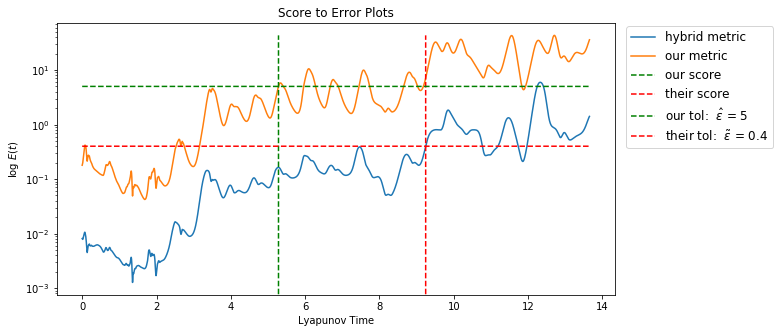

In [76]:
plot_figure_4(ind)

sample_index:  275


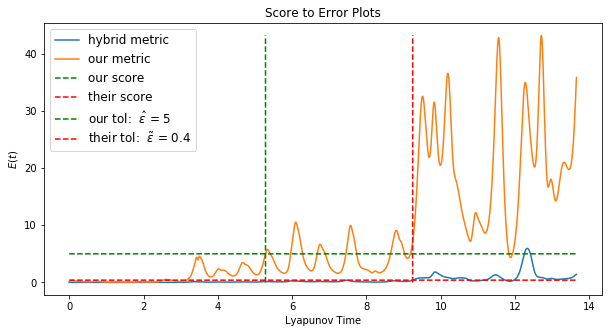

In [77]:
plot_figure_4(ind,ylog=False)

sample_index:  466


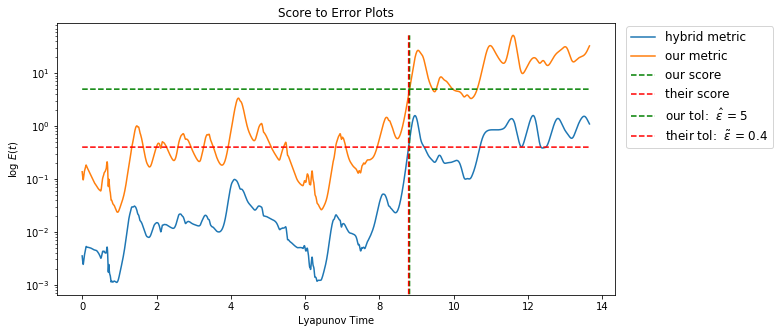

In [78]:
plot_figure_4(ind2)

# calculate the difference between our two scores

In [28]:
df['abs_score_diff'] = np.abs(df['their_score'] - df['accuracy_duration'])
df['score_diff'] = df['their_score'] - df['accuracy_duration']

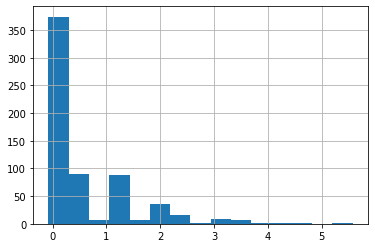

In [31]:
df['score_diff'].hist(bins=15)

In [34]:
temp = df.loc[(df['score_diff'] > 0.5) & (df['score_diff'] < 1)]
temp.shape

(83, 20)

In [35]:
# get random indices
temp.index

Int64Index([  3,  20,  23,  38,  43,  54,  59,  61,  65,  67,  82,  87,  93,
             97, 112, 122, 124, 127, 158, 167, 170, 190, 191, 193, 196, 198,
            207, 213, 214, 224, 228, 256, 260, 265, 284, 309, 310, 315, 336,
            347, 352, 361, 376, 383, 385, 389, 395, 405, 409, 410, 412, 416,
            418, 421, 424, 428, 431, 432, 440, 441, 464, 465, 472, 482, 485,
            486, 487, 495, 500, 501, 507, 509, 512, 516, 519, 561, 569, 581,
            584, 588, 596, 625, 636],
           dtype='int64')

# Indices that I like Plots for:
- two indices with max scores: (275, 466)
- others where difference between scores is smallish and where divergence is visible: 38,441,93,365,54

sample_index:  54


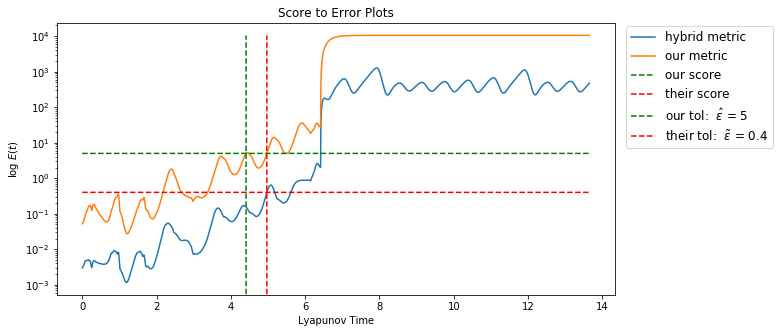

In [93]:
plot_figure_4(np.random.choice(temp.index))